# <b> Natural Language Processing - Poem

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
# remove stopwords
stop_words = stopwords.words('english')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

#### <b> Load Data

In [2]:
# load text
path = '../data/Laurence.txt'
file = open(path, 'rt')
text = file.read().split('\n')
file.close()

In [3]:
text[0:10]

['Come all ye maidens young and fair',
 'And you that are blooming in your prime',
 'Always beware and keep your garden fair',
 'Let no man steal away your thyme',
 'For thyme it is a precious thing',
 'And thyme brings all things to my mind',
 'nlyme with all its flavours, along with all its joys',
 'Thyme, brings all things to my mind',
 'Once I and a bunch of thyme',
 'i thought it never would decay']

In [4]:
type(text)

list

#### <b> Data Cleaning 

In [5]:
def _clean_(text):
    words = text.split()
    words = [w.lower() for w in words if w not in stop_words]
    words = [w for w in words if w.isalpha()]
    return ' '.join(words)

In [6]:
sentences = [_clean_(w) for w in text]
sentences[0:10]

['come ye maidens young fair',
 'and blooming prime',
 'always beware keep garden fair',
 'let man steal away thyme',
 'for thyme precious thing',
 'and thyme brings things mind',
 'nlyme along joys',
 'brings things mind',
 'once i bunch thyme',
 'thought never would decay']

In [7]:
print('Number of words in corpus = ', len(set(sentences)))

Number of words in corpus =  1673


#### <b> Enconding

In [8]:
'''
The tokenizer allow us to turn words into integers
num_words = number of words in vocabulary
oov_token = deals with words out of vocabulary it will be added to word_index to replace this words in text_to_sequence call
'''
tokenizer = Tokenizer(num_words=500, oov_token=True)

In [9]:
sentences = str(sentences)

In [10]:
# Return a sentence-tokenized copy of *text*
sentences = sent_tokenize(sentences)

In [11]:
# creates a dictionary 
tokenizer.fit_on_texts(sentences)

In [12]:
# words and frequency
word_index = tokenizer.word_index

In [13]:
# integer list with tokens  
sequences = tokenizer.texts_to_sequences(sentences)

#### <b> K-Means

In [14]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(text)

In [25]:
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)

In [26]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=4, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
clusters = model.labels_.tolist()

In [28]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [29]:
for i in range(true_k):
    print('Cluster', i),
    for ind in order_centroids[i, :10]:
        print(terms[ind])

Cluster 0
ill
oh
come
sweet
green
hand
mountain
road
home
dublin
Cluster 1
heart
fond
beguiled
thou
oh
love
omalley
bridgit
rose
shaken
Cluster 2
love
rosin
bow
old
true
goes
die
mccorley
roddy
toome
Cluster 3
old
night
said
away
day
did
like
young
fair
sea


# TSNE

In [30]:
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

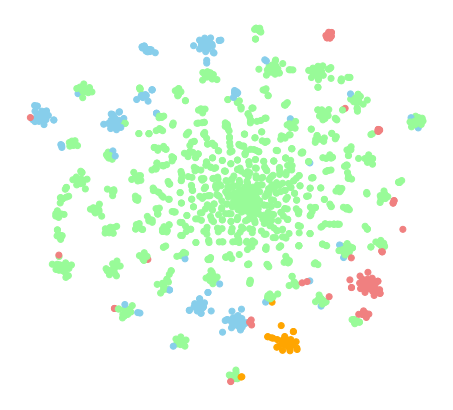

In [31]:
X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(X)
X_embedded = TSNE(n_components=2, perplexity=25, verbose=0).fit_transform(X_reduced)

fig = plt.figure(figsize=(6, 6))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,wspace=0.0, hspace=0.0)

LABEL_COLOR_MAP = {0 : 'skyblue', 1 : 'orange', 2: 'lightcoral', 3:'palegreen'}

label_color = [LABEL_COLOR_MAP[l] for l in clusters]
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], marker="o", c = label_color)